In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
from astropy.io import fits
import astropy.units as u
from astropy.table import Table, vstack, hstack, join
import re
import warnings
from tqdm import tqdm

from astroquery.simbad import Simbad
from astroquery.nist import Nist
from astroquery.xmatch import XMatch
from astroquery.vizier import Vizier

## Peruse GALEX catalogues, find most promising one

In [ ]:
# ## Find catalogues with GALEX FUV magnitudes

# galex_cat = Vizier.find_catalogs('GALEX')
# # search = ['FGK', 'Late']

# for k, v in galex_cat.items(): 
#     print(k, v.description)


In [ ]:
# table_list = Vizier.get_catalogs(galex_cat.keys())
# print( table_list )

In [ ]:
# keys = table_list.keys()[2:7]
# print( keys )

# for k in keys: print(table_list[k].columns)

## Peruse IUE catalogues, identify most promising one

In [ ]:
# iue_cat = Vizier.find_catalogs('IUE')
# for k, v in iue_cat.items(): print(k, v.description)

In [ ]:
# table_list = Vizier.get_catalogs(iue_cat.keys())
# print( table_list )

## Catalogue choices

### GALEX catalogues of interest:

II/335 Revised catalog of GALEX UV sources (GUVcat_AIS GR6+7) (Bianchi+ 2017) 

J/ApJ/766/9 GALEX observations of exoplanet host stars (Shkolnik, 2013) 

J/AJ/160/217 342 FGK-dwarfs ages using GALEX FUV magnitudes (Crandall+, 2020) 


### IUE catalogues of interest:

VI/110 Final Merged Log of IUE Observations (NASA-ESA, 2000)

In [15]:
GALEXCAT = 'II/335/galex_ais'
IUECAT = 'VI/110/inescat'

In [4]:
# iue_catlg_list = Vizier.find_catalogs('IUE')
iue_table_list = Vizier.get_catalogs(Vizier.find_catalogs('IUE').keys())
iue_data = iue_table_list['VI/110/inescat']
iue_data.columns

<TableColumns names=('Obs','ExpTime','Object','RAJ2000','DEJ2000','IUEClass','Spectrum')>

## Create combined dataset between GALEX, IUE, and SIMBAD

In [20]:
match = XMatch.query(cat1='vizier:II/335/galex_ais', 
                     cat2='vizier:VI/110/inescat', 
                     max_distance=5. * u.arcsec)

In [21]:
locmatch = pd.read_csv('/Users/isabelkain/Desktop/GALEX/xmatch_galexais_inescat.csv')

In [24]:
match[0]

angDist,RAJ2000_1,DEJ2000_1,name,objid,phID,Cat,RAfdeg,DEfdeg,FUVexp,NUVexp,GLON,GLAT,tile,img,sv,r.fov,Obs_1,b,E(B-V),Sp?,chkf,FUVmag,e_FUVmag,NUVmag,e_NUVmag,FUV.a,e_FUV.a,NUV.a,e_NUV.a,FUV.4,e_FUV.4,NUV.4,e_NUV.4,FUV.6,e_FUV.6,NUV.6,e_NUV.6,Fafl,Nafl,Fexf,Nexf,Fflux,e_Fflux,Nflux,e_Nflux,FXpos,FYpos,NXpos,NYpos,Fima,Nima,Fr,Nr,nS/G,fS/G,nell,fell,nPA,e_nPA,fPA,e_fPA,Fnr,F3r,Nar,Narms,Nbrms,Far,Farms,Fbrms,w_NUV,w_FUV,Prob,Sep,Nerr,Ferr,Ierr,Nperr,Fperr,CV,G,N,primid,groupid,Gd,Nd,primidd,groupidd,grouptot,OName,Size,_RAJ2000,_DEJ2000,Obs_2,ExpTime,Object,RAJ2000_2,DEJ2000_2,IUEClass,Spectrum
float64,float64,float64,str22,int64,int64,str3,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,int64,int64,int64,str99,int64,int64,int64,str99,str99,str31,float64,float64,float64,str19,float64,str24,float64,float64,int64,str13
1.506431,62.32128,30.775931,GALEX J040917.1+304633,6377636018877629269,6377636018874482688,AIS,62.344986,30.85057,108.1,115.1,165.5342,-15.288,50191,1441,45,0.077366,1,3,0.6843,0,0,13.0453,0.007,12.784,0.0043,-5.7747,0.007,-7.296,0.0043,-5.5551,0.0079,-6.837,0.0056,-5.6937,0.0072,-7.1771,0.0046,0,130,0,0,21972.90039,140.66701,27951.19922,110.781,1994.57,1755.59,1993.93,1755.92,4.232,6.522,0.002,0.003,0.9913,0.9749,0.0672,0.117,38.94,48.77,36.93,36.94,4.18596983,3.90629005,3.5,0.002658,0.002479,3.5,0.002719,0.002401,74.1,94.8,0.0134,1.31,0.47,0.57,0.45,0.02,0.01,C,0,1,6377636018877629440,6377636018877629269,0,1,6377636018877629440,6377636018877629269,6377636018877629269,N,0.0,62.3208,30.776,1978-04-04T20:27:00,1319.605,HD 281679,62.3208,30.776,70,INES Spectrum


In [26]:
## Query XMatch for IUE/GALEX overlap

# match = XMatch.query(cat1='vizier:II/335/galex_ais', 
#                      cat2='vizier:VI/110/inescat', 
#                      max_distance=5. * u.arcsec)

match = pd.read_csv('/Users/isabelkain/Desktop/GALEX/xmatch_galexais_inescat.csv')
print('Raw dataset length:', len(match))

## Drop columns from IUE catalogue (for cleanliness)
match.drop(columns=['Obs','ExpTime','RAJ2000','DEJ2000','IUEClass','Spectrum', 'Obs.1', 'RAJ2000.1', 'DEJ2000.1'], inplace=True)

## Clean rows with empty FUV magnitudes
print('Number of rows without FUV mags:', np.sum(np.isnan(match['FUVmag'])) )
match.dropna(axis=0, subset=['FUVmag'], inplace=True)

## Reformat IUE object names
match['Object'] = match['Object'].str.strip()

## Scrub duplicate rows
print('Duplicate rows:', np.sum(match.duplicated()) )
match = match[ ~match.duplicated() ]

# print(match.columns)
match


Raw dataset length: 15458
Number of rows without FUV mags: 3121
Duplicate rows: 10817


,angDist,name,objid,phID,Cat,RAfdeg,DEfdeg,FUVexp,NUVexp,GLON,...,Gd,Nd,primidd,groupidd,grouptot,OName,Size,_RAJ2000,_DEJ2000,Object
0,1.506431,GALEX J040917.1+304633,6377636018877629269,6377636018874482688,AIS,62.344986,30.850570,108.10,115.10,165.5342,...,0,1,6377636018877629440,6377636018877629269,6377636018877629269,N,0.00,62.3208,30.7760,HD 281679
1,1.788113,GALEX J204409.7-104324,6379641508759339455,6379641508756193280,AIS,311.302134,-10.322512,160.00,160.00,35.9712,...,0,1,6379641508759339008,6379641508759339455,6379641508759339455,N,0.00,311.0410,-10.7234,Mrk 509
2,0.511658,GALEX J040748.4-121136,6377495302864111507,6377495302860963840,AIS,61.798920,-12.249459,109.00,109.00,204.9273,...,0,1,6377495302864111616,6377495302864111507,6377495302864111507,N,0.00,61.9520,-12.1935,QSO 0405-1219
3,0.452777,GALEX J074232.8+494834,6373695375646131989,6373695375642984448,AIS,114.958984,49.816084,217.00,217.00,168.6027,...,0,1,6373695375646132224,6373695375646131989,6373695375646131989,GA:UGC03973,80.38,115.6369,49.8096,Mrk 79
4,0.989020,GALEX J122906.7+020307,6378937856751043795,6378937856747896832,AIS,187.148572,2.144949,109.00,109.00,289.9516,...,0,1,6378937856751043584,6378937856751043795,6378937856751043795,N,0.00,187.2779,2.0524,PG 1226+023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15285,0.581387,GALEX J001438.3-185558,6380591472847094403,6380591472843948032,AIS,3.602268,-18.637168,112.00,112.00,75.1071,...,0,1,6380591472847094784,6380591472847094403,6380591472847094403,N,0.00,3.6601,-18.9329,HD 1038
15308,4.071352,GALEX J115805.4+275240,6374856462072547130,6374856462069399552,AIS,179.494590,27.815766,109.00,109.00,206.2320,...,0,1,6374856462072547328,6374856462072547130,6374856462072547130,GA:NGC4004,70.49,179.5213,27.8780,NGC 4004
15352,1.248194,GALEX J221852.0-033536,6376439741636676371,6376439741633527808,AIS,335.104001,-3.775451,204.05,204.05,59.0439,...,0,1,6376439741636676608,6376439741636676371,6376439741636676371,N,0.00,334.7172,-3.5935,QSO 2216-0350
15454,1.469770,GALEX J131011.6+460124,6374715670897101027,6374715670893953024,AIS,197.264105,46.156803,208.00,214.00,113.0217,...,0,1,6374715670897100800,6374715670897101027,6374715670897101027,N,0.00,197.5478,46.0233,IUE SKY


In [27]:
astropy_match = Table.from_pandas(match)

In [28]:
simbadmatch = XMatch.query(cat1=astropy_match,
              cat2='simbad',
              max_distance=5 * u.arcsec, colRA1='_RAJ2000', colDec1='_DEJ2000')

In [29]:
simbadmatch

angDist_1,angDist_2,name,objid,phID,Cat,RAfdeg,DEfdeg,FUVexp,NUVexp,GLON,GLAT,tile,img,sv,r.fov,b,E(B-V),Sp?,chkf,FUVmag,e_FUVmag,NUVmag,e_NUVmag,FUV.a,e_FUV.a,NUV.a,e_NUV.a,FUV.4,e_FUV.4,NUV.4,e_NUV.4,FUV.6,e_FUV.6,NUV.6,e_NUV.6,Fafl,Nafl,Fexf,Nexf,Fflux,e_Fflux,Nflux,e_Nflux,FXpos,FYpos,NXpos,NYpos,Fima,Nima,Fr,Nr,nS/G,fS/G,nell,fell,nPA,e_nPA,fPA,e_fPA,Fnr,F3r,Nar,Narms,Nbrms,Far,Farms,Fbrms,w_NUV,w_FUV,Prob,Sep,Nerr,Ferr,Ierr,Nperr,Fperr,CV,G,N,primid,groupid,Gd,Nd,primidd,groupidd,grouptot,OName,Size,_RAJ2000,_DEJ2000,Object,main_id,ra,dec,coo_err_maj,coo_err_min,coo_err_angle,nbref,ra_sexa,dec_sexa,coo_qual,coo_bibcode,main_type,other_types,radvel,radvel_err,redshift,redshift_err,sp_type,morph_type,plx,plx_err,pmra,pmdec,pm_err_maj,pm_err_min,pm_err_pa,size_maj,size_min,size_angle,B,V,R,J,H,K,u,g,r,i,z
float64,float64,str22,int64,int64,str3,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,int64,int64,int64,str99,int64,int64,int64,str99,str99,str31,float64,float64,float64,str24,str43,float64,float64,float64,float64,int64,int64,str14,str14,str1,str19,str17,str58,float64,float64,float64,float64,str20,str10,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.150469,1.506431,GALEX J040917.1+304633,6377636018877629269,6377636018874482688,AIS,62.344986,30.85057,108.1,115.1,165.5342,-15.288,50191,1441,45,0.077366,3,0.6843,0,0,13.0453,0.007,12.784,0.0043,-5.7747,0.007,-7.296,0.0043,-5.5551,0.0079,-6.837,0.0056,-5.6937,0.0072,-7.1771,0.0046,0,130,0,0,21972.90039,140.66701,27951.19922,110.781,1994.57,1755.59,1993.93,1755.92,4.232,6.522,0.002,0.003,0.9913,0.9749,0.0672,0.117,38.94,48.77,36.93,36.94,4.18596983,3.90629005,3.5,0.002658,0.002479,3.5,0.002719,0.002401,74.1,94.8,0.0134,1.31,0.47,0.57,0.45,0.02,0.01,C,0,1,6377636018877629440,6377636018877629269,0,1,6377636018877629440,6377636018877629269,6377636018877629269,N,0.0,62.3208,30.776,HD 281679,NGC 1514,62.3207732807,30.775964141,0.0,0.0,90,324,04 09 16.98559,+30 46 33.4709,A,2020yCat.1350....0G,PN,*|**|HS*|IR|PN|Rad|V*|blu,59.8,--,0.0001995,--,sdO+A0/3III,--,2.2034,0.0171,-6.276,3.736,0.019,0.014,90,1.673,1.673,90,10.01,9.48,--,8.19,8.098,8.002,--,--,--,--,--
1.406709,1.788113,GALEX J204409.7-104324,6379641508759339455,6379641508756193280,AIS,311.302134,-10.322512,160.0,160.0,35.9712,-29.8553,50248,865,27,0.476348,3,0.0572,0,0,14.624,0.0125,14.4986,0.0077,-4.196,0.0125,-5.5814,0.0077,-4.1255,0.0131,-5.2932,0.0091,-4.1903,0.0126,-5.5196,0.0079,0,1,0,0,5133.18994,59.1797,5762.02002,40.689,2533.47,955.52,2533.99,955.4,2.793,4.666,0.001,0.002,0.9716,0.9998,0.1128,0.0478,-41.67,-53.97,84.07,84.05,3.18194008,2.78622007,3.5,0.001881,0.001669,3.5,0.001167,0.001111,120.3,138.3,0.296,0.74,0.47,0.57,0.45,0.03,0.01,C,0,1,6379641508759339008,6379641508759339455,0,1,6379641508759339008,6379641508759339455,6379641508759339455,N,0.0,311.041,-10.7234,Mrk 509,Mrk 509,311.040626868,-10.723535321,0.0,0.0,90,1218,20 44 09.75045,-10 43 24.7272,A,2020yCat.1350....0G,Seyfert_1,*|AGN|BH?|G|IR|QSO|Sy1|V*|X|gam,10309.222,--,0.035,--,--,S0a,0.0082,0.0325,0.006,0.028,0.023,0.018,90,0.377,0.309,80,13.35,13.12,10.7,11.584,10.766,10.005,--,--,--,--,--
0.598434,0.511658,GALEX J040748.4-121136,6377495302864111507,6377495302860963840,AIS,61.79892,-12.249459,109.0,109.0,204.9273,-41.7561,50187,2081,65,0.159593,3,0.0608,0,1,15.685,0.0221,15.1061,0.0122,-3.1349,0.0221,-4.9739,0.0122,-3.076,0.023,-4.8344,0.0133

In [30]:
## To view all votable fields (fields you can query Simbad with):
# Simbad.list_votable_fields()

## For a description of a specific field:
# Simbad.get_field_description('ubv')

### Query SIMBAD for object names

In [31]:
warnings.filterwarnings('ignore')

## Set fields to query from Simbad
fields = ['typed_id', 'fe_h', 'flux(B)','flux(V)','flux(R)','flux(I)','flux(J)',
          'flux(K)', 'flux_error(B)','flux_error(V)','flux_error(R)',
          'flux_error(I)','flux_error(J)','flux_error(K)', 'rot', 
          'sptype', 'otype', 'td1', 'ubv', 'parallax', 'distance']

customSimbad = Simbad()

for f in fields: 
    customSimbad.add_votable_fields(f)

## Create first row of results table
matchTable = Table.from_pandas(match)
r = customSimbad.query_object(match['Object'][0])

results = hstack([matchTable[0], r])


## Iterate through all rows in match, query each object and add combined data to results
    
for i, obj in enumerate(tqdm(match['Object'])):
    
    ## Skip first row, already included
    if i==0:
        continue
    
    ## Ask Simbad for information
    simbadqry = customSimbad.query_object(obj)
    
    ## Make a new row with XMatch + Simbad info for the object
    newrow = hstack([matchTable[i], simbadqry])
    
    ## Add new row to results table
    results = vstack([results, newrow])
    

## Drop rows where SIMBAD doesn't give any spectral type
results = results[results['SP_TYPE'] != '']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1520/1520 [03:00<00:00,  8.42it/s]


### Limit sample to FGK stars (by Simbad spectral stypes)

In [32]:
sptypes = np.array(['F', 'G', 'K'])
fgk_index = [False]*len(results)

for i, spt in enumerate(results['SP_TYPE'].compressed()):
    
    cond = False
    
    for s in sptypes:
        cond = np.logical_or(cond, np.any(np.isin([*spt], s)))
        
    if cond:
        fgk_index[i] = True
        
results = results[fgk_index]

results

angDist,name,objid,phID,Cat,RAfdeg,DEfdeg,FUVexp,NUVexp,GLON,GLAT,tile,img,sv,r.fov,b,E(B-V),Sp?,chkf,FUVmag,e_FUVmag,NUVmag,e_NUVmag,FUV.a,e_FUV.a,NUV.a,e_NUV.a,FUV.4,e_FUV.4,NUV.4,e_NUV.4,FUV.6,e_FUV.6,NUV.6,e_NUV.6,Fafl,Nafl,Fexf,Nexf,Fflux,e_Fflux,Nflux,e_Nflux,FXpos,FYpos,NXpos,NYpos,Fima,Nima,Fr,Nr,nS/G,fS/G,nell,fell,nPA,e_nPA,fPA,e_fPA,Fnr,F3r,Nar,Narms,Nbrms,Far,Farms,Fbrms,w_NUV,w_FUV,Prob,Sep,Nerr,Ferr,Ierr,Nperr,Fperr,CV,G,N,primid,groupid,Gd,Nd,primidd,groupidd,grouptot,OName,Size,_RAJ2000,_DEJ2000,Object,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,TYPED_ID,Fe_H_Teff,Fe_H_log_g,Fe_H_Fe_H,Fe_H_flag,Fe_H_CompStar,Fe_H_CatNo,Fe_H_bibcode,FLUX_B,FLUX_V,FLUX_R,FLUX_I,FLUX_J,FLUX_K,FLUX_ERROR_B,FLUX_ERROR_V,FLUX_ERROR_R,FLUX_ERROR_I,FLUX_ERROR_J,FLUX_ERROR_K,ROT_upVsini,ROT_Vsini,ROT_err,ROT_mes,ROT_qual,ROT_bibcode,SP_TYPE,SP_QUAL,SP_BIBCODE,OTYPE,PLX_VALUE,PLX_PREC,PLX_ERROR,PLX_QUAL,PLX_BIBCODE,Distance_distance,Distance_Q,Distance_unit,Distance_merr,Distance_perr,Distance_method,Distance_bibcode,SCRIPT_NUMBER_ID
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,unit-degK,cm/s**2,,,,,,mag,mag,mag,mag,mag,mag,,,,,,,,km / s,,,,,,,,,mas,,mas,,,,,,,,,,
float64,str22,int64,int64,str3,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,int64,int64,int64,str99,int64,int64,int64,str99,str99,str31,float64,float64,float64,str24,object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,int32,float32,float32,str1,object,str5,str19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str1,float32,float32,int32,str1,str19,object,str1,object,object,float64,int16,float32,str1,object,float64,str1,str4,float64,float64,str8,str19,int32
1.754731,GALEX J121541.2+723303,6374293536815186771,6374293536812040192,AIS,183.602981,72.877474,107.0,211.0,126.6651,44.3173,50096,2433,76,0.340086,3,0.0157,0,0,16.3306,0.032,13.6635,0.0044,-2.4894,0.032,-6.4166,0.0044,-2.4257,0.0334,-6.0788,0.0053,-2.5011,0.0319,-6.3345,0.0045,0,0,0,0,1066.04004,31.4277,12434.2002,49.8495,1699.75,1028.68,1700.37,1028.33,3.368,5.044,0.001,0.002,0.9982,0.9992,0.0258,0.0799,-72.8,-4.22,-68.35,-68.11,4.30505991,3.14287996,3.5,0.002053,0.002,3.5,0.000927,0.000853,171.2,97.3,0.0463,1.16,0.48,0.59,0.46,0.01,0.01,C,0,1,6374293536815186944,6374293536815186771,0,1,6374293536815186944,6374293536815186771,6374293536815186771,N,0.0,183.9229,72.5512,HD 106677,V* DK Dra,12 15 41.4909,+72 33 04.308,14,14,0.018,0.021,90,A,O,2020yCat.1350....0G,HD 106677,4560,--,-0.300,,SUN,,2020A&A...633A..34C,7.43,6.29,--,--,4.337,3.608,0.010,0.010,--,--,0.292,0.324,,--,--,0,,,K0+IIICH-1,C,1989ApJS...71..245K,RSCVnV*,6.706,4,0.0223,A,2020yCat.1350....0G,149.1220,,pc,-0.4959,0.4959,paral,2020yCat.1350....0G,1
1.632329,GALEX J062006.3-484428,6385411747929393556,6385411747926245376,AIS,95.13544,-48.868826,112.0,112.0,256.8029,-25.0095,50412,929,29,0.146525,3,0.0652,0,0,18.9305,0.1165,12.6032,0.0039,0.1105,0.1165,-7.4768,0.0039,0.262,0.1246,-6.8717,0.0056,0.0949,0.1226,-7.3458,0.0042,0,2,0,0,97.2289,10.4267,33016.60156,118.595,1994.56,2294.06,1994.17,2294.73,3.867,8.441,0.002,0.004,0.5435,0.9836,0.1141,0.2112,-68.22,-58.79,4.71,4.76,7.61154985,4.33433008,3.5,0.002521,0.002233,3.5,0.00085,0.000671,77.3,103.9,0.0336,1.42,0.47,0.71,0.55,0.01,0.09,C,0,1,6385411747929393152,6385411747929393556,0,1,638541174792939

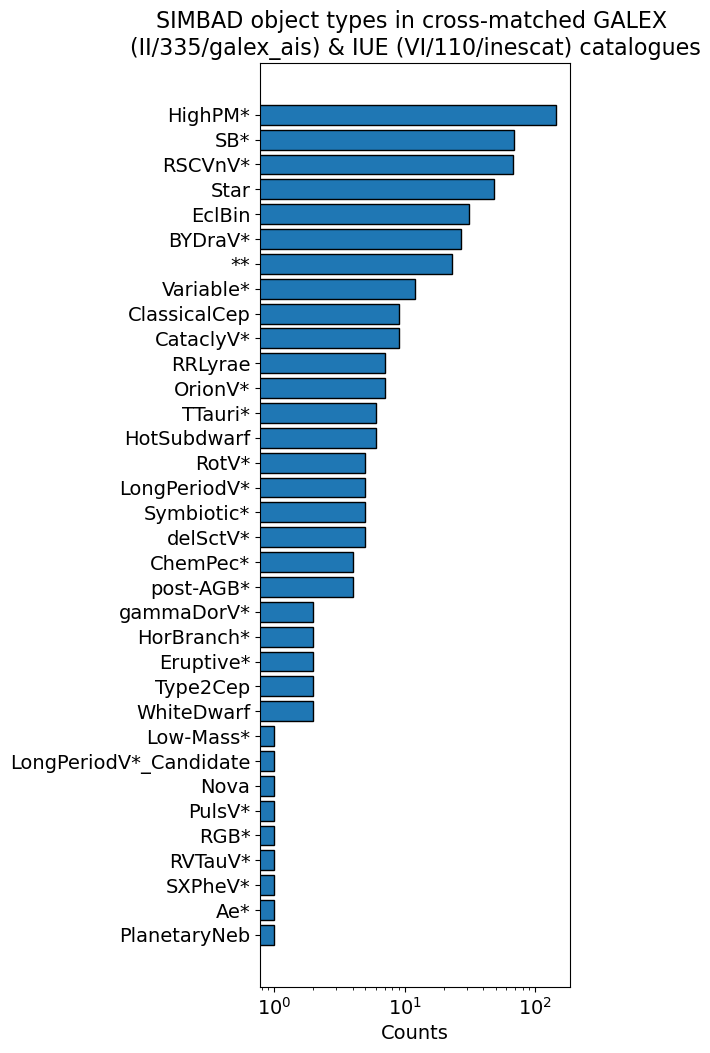

In [43]:
cats = np.unique(results['OTYPE'])
counts = np.zeros(len(cats))

for i in range(len(cats)):
    counts[i] = np.sum( results['OTYPE'] == cats[i] )
    
order = np.argsort(counts)
cats = cats[order]
counts = counts[order]

plt.figure(figsize=(4,12))
plt.barh(cats, counts, edgecolor='k')
plt.yticks(fontsize=14, c='k');
plt.xticks(fontsize=14, c='k');
plt.xlabel('Counts', fontsize=14, c='k');
plt.title('SIMBAD object types in cross-matched GALEX \n(II/335/galex_ais) & IUE (VI/110/inescat) catalogues', 
          fontsize=16, c='k')
plt.xscale('log')


### Limit dataset to "normal" stars

In [34]:
## Limit dataset to "normal" stars

print( 'Unique object types: \n', np.unique(results['OTYPE'].compressed()) )

drop_types = ['**', 'Ae*', 'BYDraV*', 'CataclyV*', 'ChemPec*', 'ClassicalCep',
              'EclBin', 'Eruptive*', 'HotSubdwarf',
              'Nova', 'OrionV*', 'PlanetaryNeb', 'PulsV*', 'RRLyrae', 'RSCVnV*',
              'RVTauV*', 'RotV*', 'SB*', 'SXPheV*', 'Symbiotic*',
              'Type2Cep', 'Variable*', 'WhiteDwarf', 'delSctV*', 'gammaDorV*', ]


dropbool = [True]*len(results)
for objtype in drop_types: dropbool = dropbool * (results['OTYPE']!=objtype).data 
filtresults = results[dropbool]

print(len(results), len(filtresults))


Unique object types: 
 ['**' 'Ae*' 'BYDraV*' 'CataclyV*' 'ChemPec*' 'ClassicalCep' 'EclBin'
 'Eruptive*' 'HighPM*' 'HorBranch*' 'HotSubdwarf' 'LongPeriodV*'
 'LongPeriodV*_Candidate' 'Low-Mass*' 'Nova' 'OrionV*' 'PlanetaryNeb'
 'PulsV*' 'RGB*' 'RRLyrae' 'RSCVnV*' 'RVTauV*' 'RotV*' 'SB*' 'SXPheV*'
 'Star' 'Symbiotic*' 'TTauri*' 'Type2Cep' 'Variable*' 'WhiteDwarf'
 'delSctV*' 'gammaDorV*' 'post-AGB*']
512 212


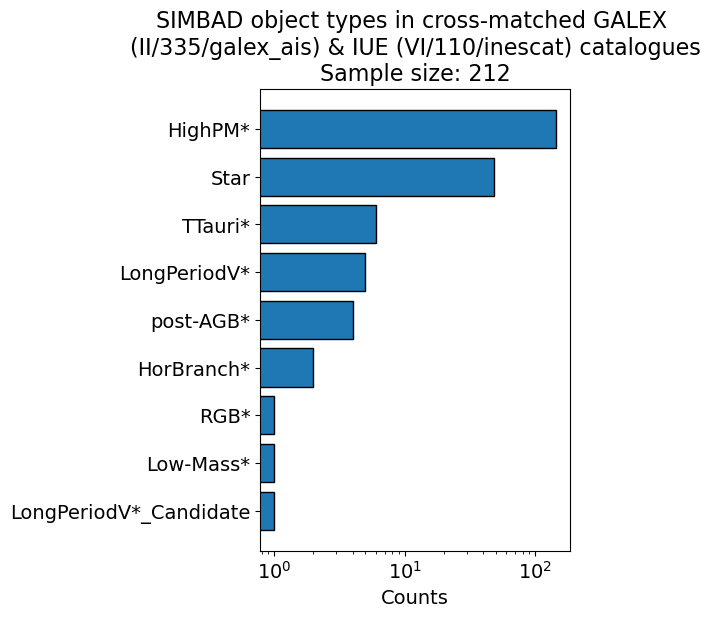

In [37]:
cats = np.unique(filtresults['OTYPE'])
counts = np.zeros(len(cats))

for i in range(len(cats)):
    counts[i] = np.sum( filtresults['OTYPE'] == cats[i] )
    
order = np.argsort(counts)
cats = cats[order]
counts = counts[order]

plt.figure(figsize=(4,6))
plt.barh(cats, counts, edgecolor='k')
plt.yticks(fontsize=14, c='k');
plt.xticks(fontsize=14, c='k');
plt.xlabel('Counts', fontsize=14, c='k');
plt.title(f'SIMBAD object types in cross-matched GALEX \n(II/335/galex_ais) & IUE (VI/110/inescat) catalogues\nSample size: {len(filtresults)}', 
          fontsize=16, c='k')
plt.xscale('log')


In [42]:
for nm in filtresults['MAIN_ID']:
    if "NGC" in nm: print(nm)

## Exploratory analysis of cleaned dataset

In [420]:
filtresults.columns

<TableColumns names=('angDist','name','objid','phID','Cat','RAfdeg','DEfdeg','FUVexp','NUVexp','GLON','GLAT','tile','img','sv','r.fov','b','E(B-V)','Sp?','chkf','FUVmag','e_FUVmag','NUVmag','e_NUVmag','FUV.a','e_FUV.a','NUV.a','e_NUV.a','FUV.4','e_FUV.4','NUV.4','e_NUV.4','FUV.6','e_FUV.6','NUV.6','e_NUV.6','Fafl','Nafl','Fexf','Nexf','Fflux','e_Fflux','Nflux','e_Nflux','FXpos','FYpos','NXpos','NYpos','Fima','Nima','Fr','Nr','nS/G','fS/G','nell','fell','nPA','e_nPA','fPA','e_fPA','Fnr','F3r','Nar','Narms','Nbrms','Far','Farms','Fbrms','w_NUV','w_FUV','Prob','Sep','Nerr','Ferr','Ierr','Nperr','Fperr','CV','G','N','primid','groupid','Gd','Nd','primidd','groupidd','grouptot','OName','Size','_RAJ2000','_DEJ2000','Object','MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE','TYPED_ID','Fe_H_Teff','Fe_H_log_g','Fe_H_Fe_H','Fe_H_flag','Fe_H_CompStar','Fe_H_CatNo','Fe_H_bibcode','FLUX_B','FLUX_V','FLUX_R','FLUX_I','FL

### Color-color diagrams of "normal" dataset

In [467]:
cmap = mpl.colormaps['turbo_r']
normaltypecolors = cmap(np.linspace(0,1,len(np.unique(filtresults['OTYPE']))))
alltypecolors = cmap(np.linspace(0,1,len(np.unique(results['OTYPE']))))

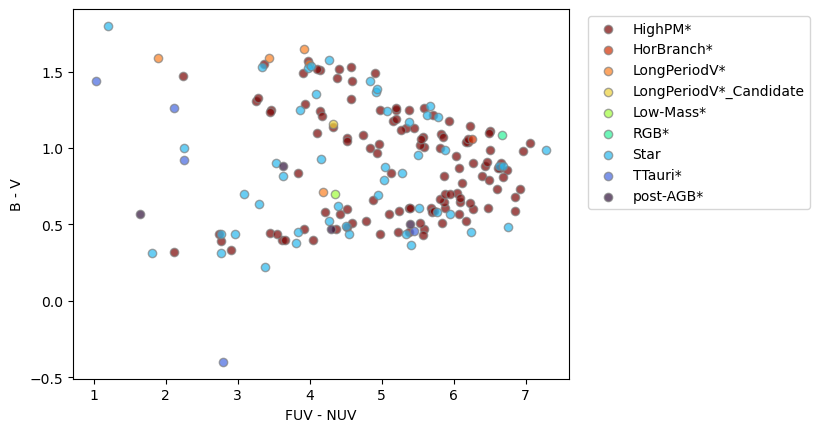

In [476]:
## FUV-NUV vs B-V

for i, otype in enumerate(np.unique(filtresults['OTYPE'])):
    
    plt.scatter(filtresults[filtresults['OTYPE']==otype]['FUVmag'] - filtresults[filtresults['OTYPE']==otype]['NUVmag'], 
                filtresults[filtresults['OTYPE']==otype]['FLUX_B'] - filtresults[filtresults['OTYPE']==otype]['FLUX_V'], 
                color=normaltypecolors[i], alpha=0.7, ec='gray', label=otype)

plt.xlabel('FUV - NUV')
plt.ylabel('B - V')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

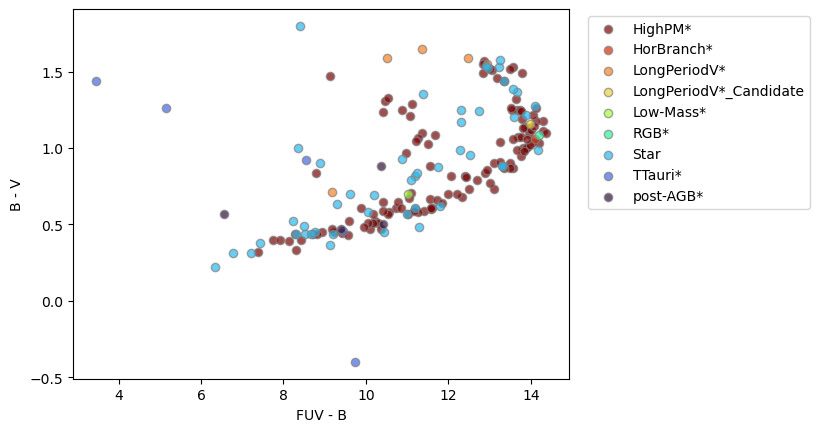

In [475]:
## FUV-B vs B-V

for i, otype in enumerate(np.unique(filtresults['OTYPE'])):
    
    plt.scatter(filtresults[filtresults['OTYPE']==otype]['FUVmag'] - filtresults[filtresults['OTYPE']==otype]['FLUX_B'], 
                filtresults[filtresults['OTYPE']==otype]['FLUX_B'] - filtresults[filtresults['OTYPE']==otype]['FLUX_V'], 
                color=normaltypecolors[i], alpha=0.7, ec='gray', label=otype)

plt.xlabel('FUV - B')
plt.ylabel('B - V')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

### Color-color diagrams of full dataset

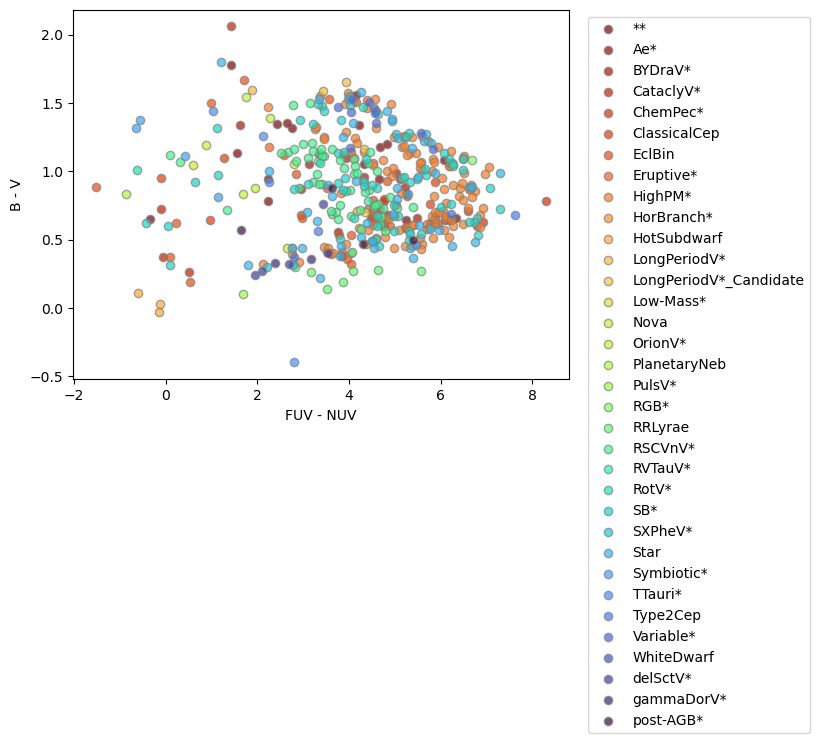

In [474]:
## FUV-NUV vs B-V

for i, otype in enumerate(np.unique(results['OTYPE'])):
    
    plt.scatter(results[results['OTYPE']==otype]['FUVmag'] - results[results['OTYPE']==otype]['NUVmag'], 
                results[results['OTYPE']==otype]['FLUX_B'] - results[results['OTYPE']==otype]['FLUX_V'], 
                color=alltypecolors[i], alpha=0.7, ec='gray', label=otype)

plt.xlabel('FUV - NUV')
plt.ylabel('B - V')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

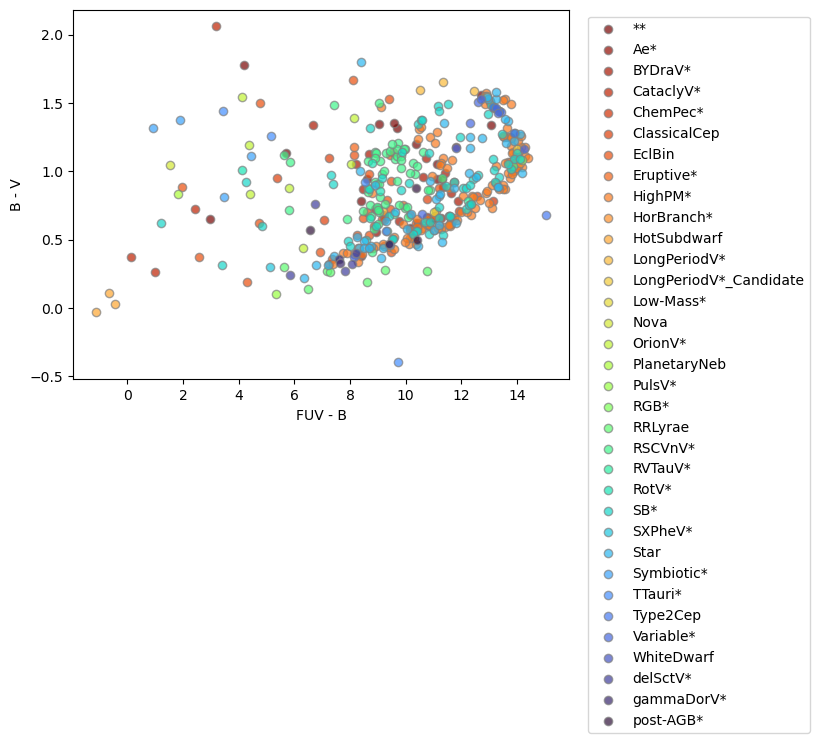

In [477]:
## FUV-B vs B-V

for i, otype in enumerate(np.unique(results['OTYPE'])):
    
    plt.scatter(results[results['OTYPE']==otype]['FUVmag'] - results[results['OTYPE']==otype]['FLUX_B'], 
                results[results['OTYPE']==otype]['FLUX_B'] - results[results['OTYPE']==otype]['FLUX_V'], 
                color=alltypecolors[i], alpha=0.7, ec='gray', label=otype)

plt.xlabel('FUV - B')
plt.ylabel('B - V')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

### Color-color: Comparisons between full and normal datasets

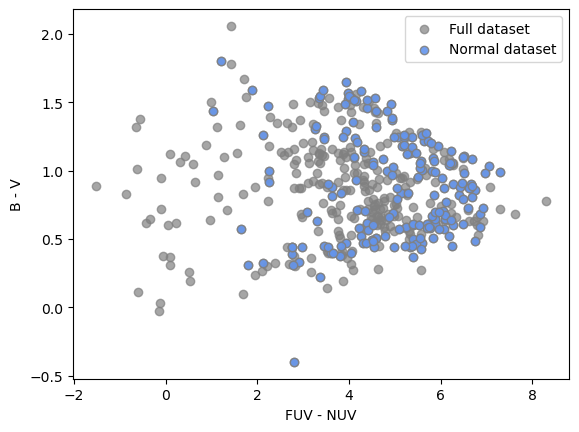

In [481]:
plt.scatter(results['FUVmag'] - results['NUVmag'], 
            results['FLUX_B'] - results['FLUX_V'], 
            color='gray', alpha=0.7, ec='gray', label='Full dataset')

plt.scatter(filtresults['FUVmag'] - filtresults['NUVmag'], 
            filtresults['FLUX_B'] - filtresults['FLUX_V'], 
            color='cornflowerblue', alpha=0.9, ec='gray', label='Normal dataset')


plt.xlabel('FUV - NUV')
plt.ylabel('B - V')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

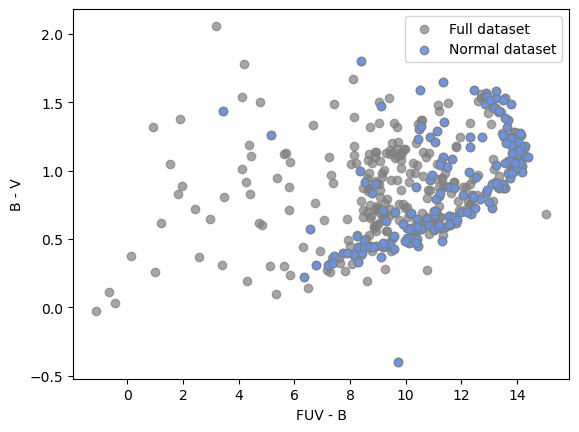

In [482]:
plt.scatter(results['FUVmag'] - results['FLUX_B'], 
            results['FLUX_B'] - results['FLUX_V'], 
            color='gray', alpha=0.7, ec='gray', label='Full dataset')

plt.scatter(filtresults['FUVmag'] - filtresults['FLUX_B'], 
            filtresults['FLUX_B'] - filtresults['FLUX_V'], 
            color='cornflowerblue', alpha=0.9, ec='gray', label='Normal dataset')


plt.xlabel('FUV - B')
plt.ylabel('B - V')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

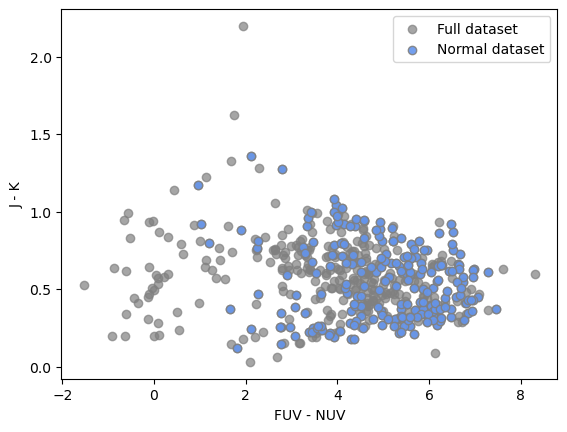

In [487]:
plt.scatter(results['FUVmag'] - results['NUVmag'], 
            results['FLUX_J'] - results['FLUX_K'], 
            color='gray', alpha=0.7, ec='gray', label='Full dataset')

plt.scatter(filtresults['FUVmag'] - filtresults['NUVmag'], 
            filtresults['FLUX_J'] - filtresults['FLUX_K'], 
            color='cornflowerblue', alpha=0.9, ec='gray', label='Normal dataset')


plt.xlabel('FUV - NUV')
plt.ylabel('J - K')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))